<a href="https://colab.research.google.com/github/PraveenLiyanage/Car-Price-Prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

import os

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Visualisation Datasets/CarsData.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford


In [ ]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000
mean,2017.066502,16773.487555,23219.475499,120.142408,55.205623,1.664913
std,2.118661,9868.552222,21060.882301,63.357250,16.181659,0.558574
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7673.000000,125.000000,47.100000,1.200000
50%,2017.000000,14470.000000,17682.500000,145.000000,54.300000,1.600000
75%,2019.000000,20750.000000,32500.000000,145.000000,62.800000,2.000000
max,2024.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


In [ ]:
columns = df.columns.tolist()
columns = columns[:2] + columns[3:] + columns[2:3]
df = df[columns]

In [ ]:
df.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer,price
0,I10,2017,Manual,11630,Petrol,145,60.1,1.0,hyundi,7495
1,Polo,2017,Manual,9200,Petrol,145,58.9,1.0,volkswagen,10989
2,2 Series,2019,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW,27990
3,Yeti Outdoor,2017,Manual,30960,Diesel,150,62.8,2.0,skoda,12495
4,Fiesta,2017,Manual,19353,Petrol,125,54.3,1.2,ford,7999


## Corellation using different between Features and Price

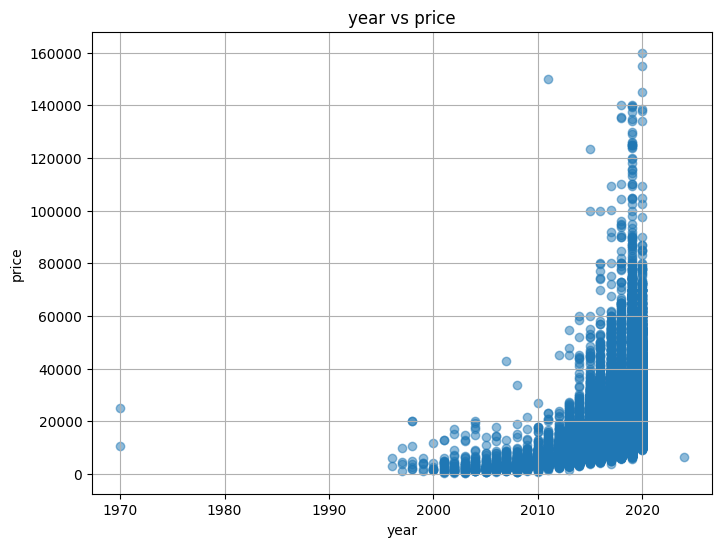

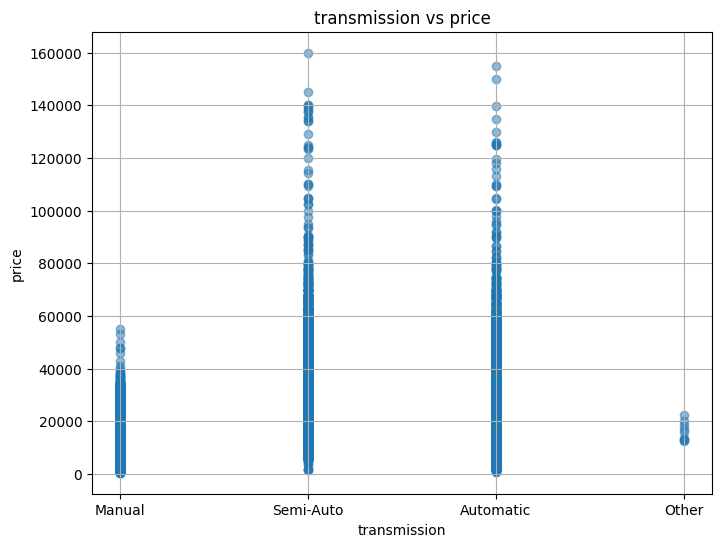

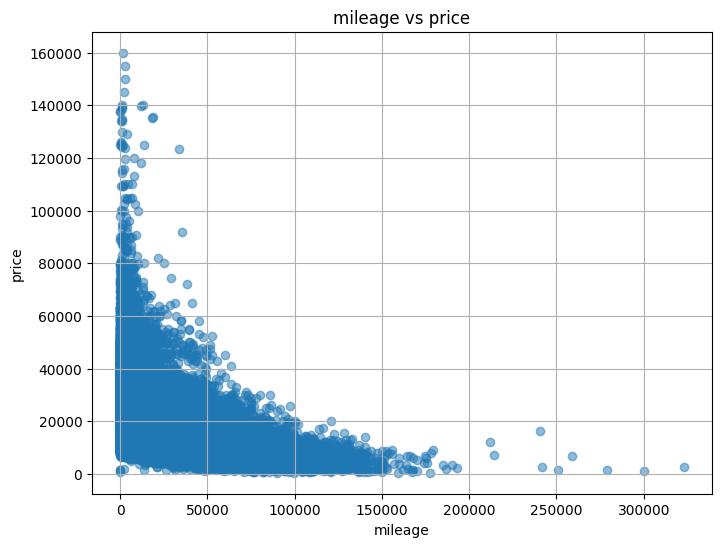

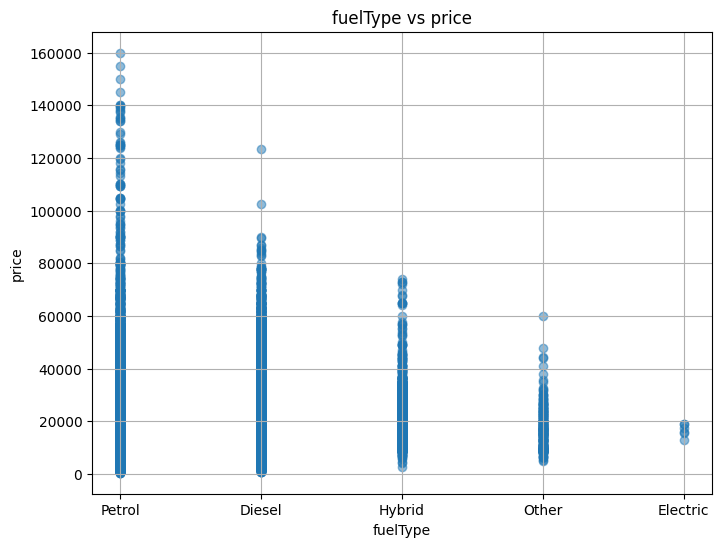

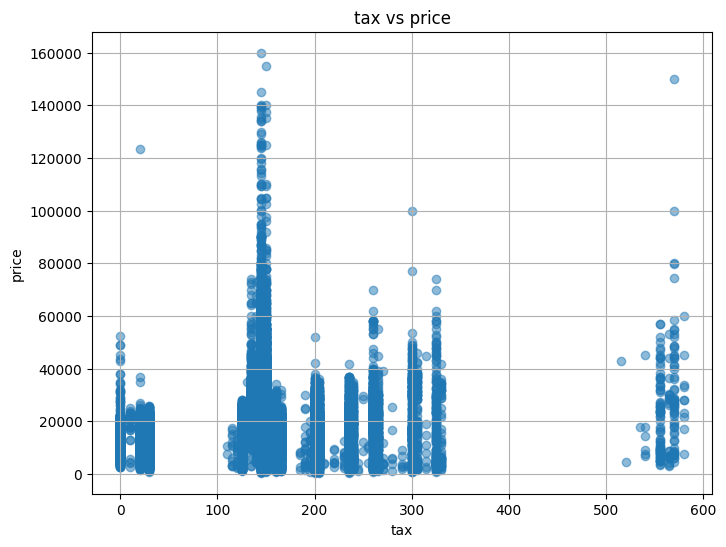

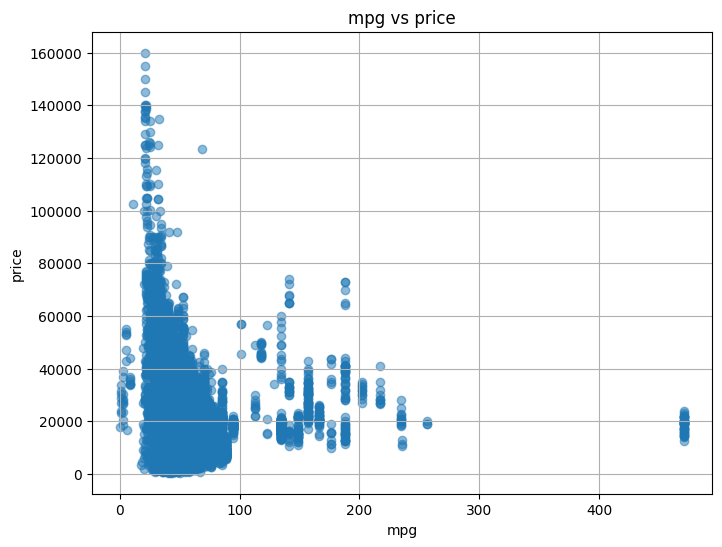

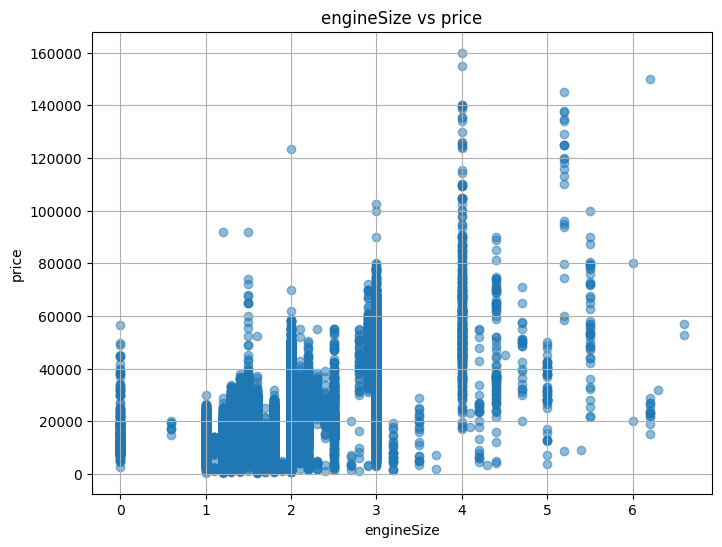

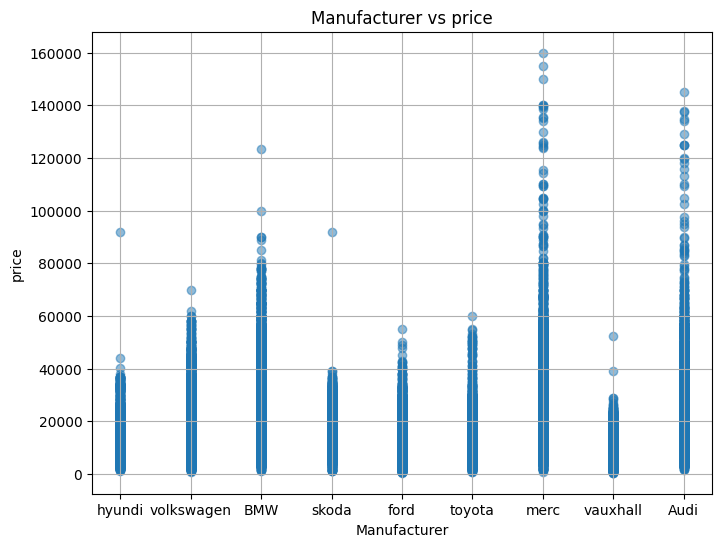

In [ ]:
for label in df.columns[1:-1]:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[label], df['price'], alpha=0.5)
    plt.xlabel(label)
    plt.ylabel('price')
    plt.title(label + ' vs price')
    plt.grid(True)
    plt.show()

## Handling outliers and preparing datasets

In [ ]:
df = pd.get_dummies(df, columns=['transmission'])
df.head()

,model,year,mileage,fuelType,tax,mpg,engineSize,Manufacturer,price,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto
0,I10,2017,11630,Petrol,145,60.1,1.0,hyundi,7495,False,True,False,False
1,Polo,2017,9200,Petrol,145,58.9,1.0,volkswagen,10989,False,True,False,False
2,2 Series,2019,1614,Diesel,145,49.6,2.0,BMW,27990,False,False,False,True
3,Yeti Outdoor,2017,30960,Diesel,150,62.8,2.0,skoda,12495,False,True,False,False
4,Fiesta,2017,19353,Petrol,125,54.3,1.2,ford,7999,False,True,False,False


In [ ]:
model_mean_prices = df.groupby('model')['price'].mean()
df['model_mean_price'] = df['model'].map(model_mean_prices)
manufacturer_mean_prices = df.groupby('Manufacturer')['price'].mean()
df['manufacturer_mean_price'] = df['Manufacturer'].map(manufacturer_mean_prices)
df.head()

,model,year,mileage,fuelType,tax,mpg,engineSize,Manufacturer,price,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,model_mean_price,manufacturer_mean_price
0,I10,2017,11630,Petrol,145,60.1,1.0,hyundi,7495,False,True,False,False,7718.184731,12727.809384
1,Polo,2017,9200,Petrol,145,58.9,1.0,volkswagen,10989,False,True,False,False,11318.725647,16807.898073
2,2 Series,2019,1614,Diesel,145,49.6,2.0,BMW,27990,False,False,False,True,19445.345118,22692.888691
3,Yeti Outdoor,2017,30960,Diesel,150,62.8,2.0,skoda,12495,False,True,False,False,12756.576497,14284.802683
4,Fiesta,2017,19353,Petrol,125,54.3,1.2,ford,7999,False,True,False,False,10190.856199,12269.779238


In [ ]:
df = pd.get_dummies(df, columns=['fuelType'])
df.head()

,model,year,mileage,tax,mpg,engineSize,Manufacturer,price,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,model_mean_price,manufacturer_mean_price,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,I10,2017,11630,145,60.1,1.0,hyundi,7495,False,True,False,False,7718.184731,12727.809384,False,False,False,False,True
1,Polo,2017,9200,145,58.9,1.0,volkswagen,10989,False,True,False,False,11318.725647,16807.898073,False,False,False,False,True
2,2 Series,2019,1614,145,49.6,2.0,BMW,27990,False,False,False,True,19445.345118,22692.888691,True,False,False,False,False
3,Yeti Outdoor,2017,30960,150,62.8,2.0,skoda,12495,False,True,False,False,12756.576497,14284.802683,True,False,False,False,False
4,Fiesta,2017,19353,125,54.3,1.2,ford,7999,False,True,False,False,10190.856199,12269.779238,False,False,False,False,True


In [ ]:
df.describe()

,year,mileage,tax,mpg,engineSize,price,model_mean_price,manufacturer_mean_price
count,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000
mean,2017.066502,23219.475499,120.142408,55.205623,1.664913,16773.487555,16773.487555,16773.487555
std,2.118661,21060.882301,63.357250,16.181659,0.558574,9868.552222,7757.484506,5267.249058
min,1970.000000,1.000000,0.000000,0.300000,0.000000,450.000000,1295.000000,10314.259541
25%,2016.000000,7673.000000,125.000000,47.100000,1.200000,9999.000000,10548.840340,12269.779238
50%,2017.000000,17682.500000,145.000000,54.300000,1.600000,14470.000000,15817.342205,16807.898073
75%,2019.000000,32500.000000,145.000000,62.800000,2.000000,20750.000000,20972.675472,22692.888691
max,2024.000000,323000.000000,580.000000,470.800000,6.600000,159999.000000,98934.200000,24636.426361


In [ ]:
min_threshold = 10
max_threshold = 150
df_cleaned = df[(df['mpg'] < max_threshold)]
df_cleaned = df_cleaned[(df_cleaned['mpg'] > min_threshold)]
df_cleaned.describe()

,year,mileage,tax,mpg,engineSize,price,model_mean_price,manufacturer_mean_price
count,97406.000000,97406.000000,97406.000000,97406.000000,97406.000000,97406.000000,97406.000000,97406.000000
mean,2017.064041,23224.923506,120.189978,54.745784,1.665427,16743.693171,16763.360768,16766.128400
std,2.119732,21054.853720,63.343762,12.141593,0.558040,9852.900490,7763.144967,5268.502755
min,1970.000000,1.000000,0.000000,11.000000,0.000000,450.000000,1295.000000,10314.259541
25%,2016.000000,7691.000000,125.000000,47.100000,1.200000,9999.000000,10548.840340,12269.779238
50%,2017.000000,17693.000000,145.000000,54.300000,1.600000,14400.000000,15817.342205,16807.898073
75%,2019.000000,32500.000000,145.000000,62.800000,2.000000,20692.000000,20972.675472,22692.888691
max,2024.000000,323000.000000,580.000000,148.700000,6.600000,159999.000000,98934.200000,24636.426361


In [ ]:
columns = df_cleaned.columns.tolist()
columns = columns[8:12] + columns[14:20] + columns[1:6] + columns[12:14]  + columns[7:8] + columns[:1] + columns[6:7]
df_cleaned = df_cleaned[columns]
df_cleaned.head()

,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,year,mileage,tax,mpg,engineSize,model_mean_price,manufacturer_mean_price,price,model,Manufacturer
0,False,True,False,False,False,False,False,False,True,2017,11630,145,60.1,1.0,7718.184731,12727.809384,7495,I10,hyundi
1,False,True,False,False,False,False,False,False,True,2017,9200,145,58.9,1.0,11318.725647,16807.898073,10989,Polo,volkswagen
2,False,False,False,True,True,False,False,False,False,2019,1614,145,49.6,2.0,19445.345118,22692.888691,27990,2 Series,BMW
3,False,True,False,False,True,False,False,False,False,2017,30960,150,62.8,2.0,12756.576497,14284.802683,12495,Yeti Outdoor,skoda
4,False,True,False,False,False,False,False,False,True,2017,19353,125,54.3,1.2,10190.856199,12269.779238,7999,Fiesta,ford


In [ ]:
df_cleaned[['transmission_Automatic', 'transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto']] = df_cleaned[['transmission_Automatic', 'transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto']].astype(float)
df_cleaned[['fuelType_Diesel', 'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol']] = df_cleaned[['fuelType_Diesel', 'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol']].astype(float)
df_cleaned['price'] = df_cleaned['price'].astype(int)

In [ ]:
train, valid, test = np.split(df_cleaned.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))], axis=0)

In [ ]:
def split_columns(dataframe):
    x_binary_dummy = dataframe[dataframe.columns[:9]].values
    x_numerical = dataframe[dataframe.columns[9:-3]].values
    y = dataframe[dataframe.columns[-3]].values
    scaler = StandardScaler()
    x_numerical_scaled = scaler.fit_transform(x_numerical)
    x_scaled = np.concatenate((x_binary_dummy,x_numerical_scaled), axis=1)

    return x_scaled,y

## Neural Net

In [ ]:
import tensorflow as tf

In [ ]:
def train_model(x_train,y_train,num_nodes,dropout_prob,learning_rate,batch_size,epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(16,)),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes,activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='relu')
     ]
    )
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='mean_squared_error', metrics=['mean_absolute_error'])
    history = nn_model.fit(x_train,y_train, epochs=epochs, batch_size=batch_size,validation_data = (valid_x, valid_y), verbose=0)
    return nn_model, history

In [ ]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

    ax1.plot(history.history['mean_absolute_error'], label='mean absolute error')
    ax1.plot(history.history['val_mean_absolute_error'], label='val mean absolute error')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Mean absolute error')
    ax1.grid(True)


    ax2.plot(history.history['loss'], label='loss')
    ax2.plot(history.history['val_loss'], label='val_loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('MSE')
    ax2.grid(True)
    plt.legend()
    plt.show()

## Linear Regression

In [ ]:
def split_columns_no_scaling(dataframe):
    x = dataframe[dataframe.columns[:-3]].values
    y = dataframe[dataframe.columns[-3]].values
    return x,y

In [ ]:
train_x_reg, train_y_reg = split_columns_no_scaling(train)
valid_x_reg, valid_y_reg = split_columns_no_scaling(valid)
test_x_reg, test_y_reg = split_columns_no_scaling(test)

In [ ]:
reg_model = LinearRegression()
reg_model.fit(train_x_reg,train_y_reg)
reg_model.score(valid_x_reg,valid_y_reg)

0.8516680523292783

In [ ]:
y_pred = reg_model.predict(test_x_reg)
mean_absolute_error = 0
i = 0
for pred in y_pred:
    mean_absolute_error += abs(pred - test_y_reg[i])
    i += 1
mean_absolute_error = mean_absolute_error / len(y_pred)
print(mean_absolute_error)

2463.3637338314225


## Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100, random_state=23, oob_score=True)
regressor.fit(train_x_reg, train_y_reg)
oob_score = regressor.oob_score_
print('oob_score (R squared) of the regressor is: ' + str(oob_score))

oob_score (R squared) of the regressor is: 0.9591830143751376


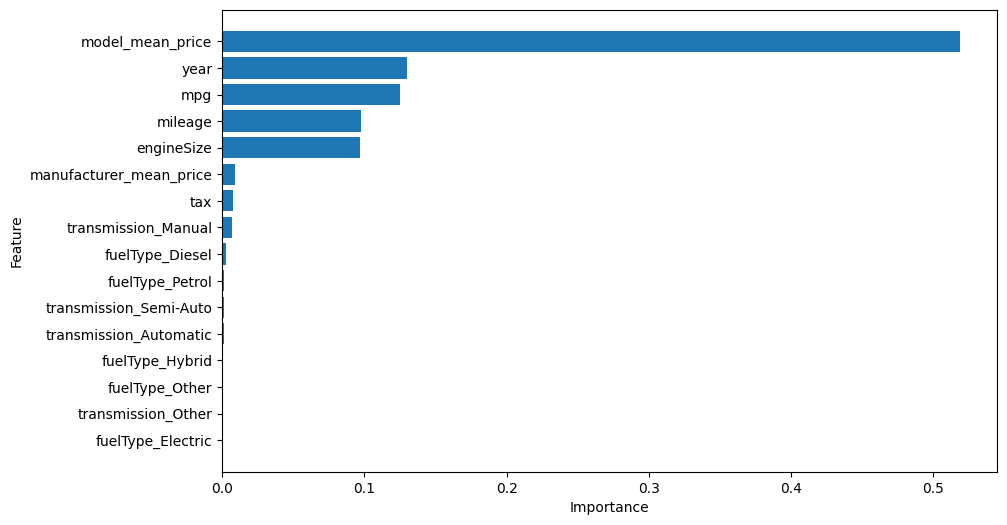

In [ ]:
sorted_indices = np.argsort(regressor.feature_importances_)
plt.figure(figsize=(10,6))
plt.barh(range(16), regressor.feature_importances_[sorted_indices], tick_label=df_cleaned.columns[sorted_indices])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
predictions = regressor.predict(test_x_reg)
mean_absolute_error = 0
i = 0
for prediction in predictions:
    mean_absolute_error += abs(prediction - test_y_reg[i])
    i += 1
mean_absolute_error = mean_absolute_error / len(test_y_reg)
print(str(mean_absolute_error))

1130.7149463924586


## Model Testing

In [ ]:
df_cleaned['Manufacturer'].unique()

array(['hyundi', 'volkswagen', 'BMW', 'skoda', 'ford', 'toyota', 'merc',
       'vauxhall', 'Audi'], dtype=object)

In [ ]:
models = df_cleaned['model'].unique()
models.sort()
print(models)

[' 1 Series' ' 2 Series' ' 3 Series' ' 4 Series' ' 5 Series' ' 6 Series'
 ' 7 Series' ' 8 Series' ' A Class' ' A1' ' A2' ' A3' ' A4' ' A5' ' A6'
 ' A7' ' A8' ' Accent' ' Adam' ' Agila' ' Amarok' ' Amica' ' Antara'
 ' Arteon' ' Astra' ' Auris' ' Avensis' ' Aygo' ' B Class' ' B-MAX'
 ' Beetle' ' C Class' ' C-HR' ' C-MAX' ' CC' ' CL Class' ' CLA Class'
 ' CLC Class' ' CLK' ' CLS Class' ' Caddy' ' Caddy Life' ' Caddy Maxi'
 ' Caddy Maxi Life' ' California' ' Camry' ' Caravelle' ' Cascada'
 ' Citigo' ' Combo Life' ' Corolla' ' Corsa' ' Crossland X' ' E Class'
 ' EcoSport' ' Edge' ' Eos' ' Escort' ' Fabia' ' Fiesta' ' Focus' ' Fox'
 ' Fusion' ' G Class' ' GL Class' ' GLA Class' ' GLB Class' ' GLC Class'
 ' GLE Class' ' GLS Class' ' GT86' ' GTC' ' Galaxy' ' Getz' ' Golf'
 ' Golf SV' ' Grand C-MAX' ' Grand Tourneo Connect' ' Grandland X'
 ' Hilux' ' I10' ' I20' ' I30' ' I40' ' I800' ' IQ' ' IX20' ' IX35'
 ' Insignia' ' Ioniq' ' Jetta' ' KA' ' Ka+' ' Kadjar' ' Kamiq' ' Karoq'
 ' Kodiaq' ' Kona'

In [ ]:
def test_model(new_instances):
    price_diff = 0
    for instance in new_instances:
        model = instance[14]
        model_prices = df_cleaned[df_cleaned['model'] == instance[14]]['price']
        manufacturer_prices = df_cleaned[df_cleaned['Manufacturer'] == instance[15]]['price']
        instance[14] = model_prices.mean()
        instance[15] = manufacturer_prices.mean()
        instance = instance.astype(float)
        predictions_instance = regressor.predict(instance[:-1].reshape(1,-1))
        price_diff += instance[16] - predictions_instance[0]
        print("model: " + str(model) + ", " + str(int(instance[9])) + " with real price of " + str(instance[16]) + " has a predicted price of " + str(predictions_instance[0]) + " euros.")
    average_price_diff = price_diff / len(new_instances)
    if (average_price_diff > 0):
        print("the model underestimates the price by " + str(average_price_diff) + " euros on average.")
    else:
        print("the model overestimates the price by " + str(abs(average_price_diff)) + " euros on average.")

In [ ]:
new_instances = np.array([[0,1,0,0,1,0,0,0,0,2016,93000,145,46.12,1.6,' Golf','volkswagen',10000],
                        [0,1,0,0,1,0,0,0,0,2009,22000,145,38,1.9,' Octavia','skoda',3900],
                        [0,1,0,0,1,0,0,0,0,2018,11000,145,42,1.5,' C-MAX','ford',11300]])
test_model(new_instances)

model:  Golf, 2016 with real price of 10000.0 has a predicted price of 9659.47 euros.
model:  Octavia, 2009 with real price of 3900.0 has a predicted price of 8671.25 euros.
model:  C-MAX, 2018 with real price of 11300.0 has a predicted price of 13779.6 euros.
the model overestimates the price by 2303.44 euros on average.
